In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score as acc
#import mnist
from keras.metrics import AUC
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

# можно брать mnist из специальной библиотеки
#train_images = mnist.train_images()
#train_labels = mnist.train_labels()
#test_images = mnist.test_images()
#test_labels = mnist.test_labels()

# приведем изображение к диапазону (-1,1).
train_images = (train_imagesi / 127) - 1
test_images = (test_imagesi / 127) - 1

# делаем векторизацию, т.к. наши слои полносвязные и хотят на вход вектор.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

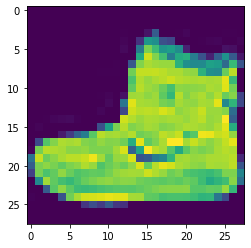

9


In [3]:
plt.imshow(train_imagesi[0,:,:])
plt.show()
print(train_labels[0])

In [4]:
train_imagesi.shape

(60000, 28, 28)

In [5]:
train_images.shape

(60000, 784)

In [6]:
def model_keras(neurons_numb1 = -1, layers = 2, opt = 'adam', p = 11):
  
  model = Sequential(name='my_model')
  model.add(Dense(      128, activation='relu', input_shape=(784,)))  
  if neurons_numb1 != -1:
    model.add(Dense(neurons_numb1, activation='tanh'))
  else:
    for k in range(layers):
      model.add(Dense(10+(p-k)*10, activation='tanh')) 
  # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh

  model.add(Dense(10, activation='softmax'))

  model.compile(
    optimizer= opt,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )


  model.fit(  
    train_images,
    to_categorical(train_labels),
    epochs=15,
    batch_size=1024, validation_split=0.2
  )


  model.evaluate( 
    test_images,
    to_categorical(test_labels)
  )

  y_pred_tr = model.predict(train_images)
  y_pred_class_tr = np.argmax(y_pred_tr,axis=1)

  y_pred_tst = model.predict(test_images)
  y_pred_class_tst = np.argmax(y_pred_tst,axis=1)
 
  acc_train = acc(train_labels, y_pred_class_tr)
  acc_test = acc(test_labels, y_pred_class_tst)

  return model, acc_train, acc_test
  

In [7]:
acc_table = pd.DataFrame(columns = ['neyrons', 'train_acc', 'test_acc'])
ik = 0 
for neyrons in [64, 90, 110, 128, 150, 200, 250, 400]:
  acc_table_mean = [[],[]]
  for j in range(5):
    model1, acc_train, acc_test = model_keras(neurons_numb1 = neyrons)
    acc_table_mean[0].append(acc_train)
    acc_table_mean[1].append(acc_test)
  acc_table.loc[ik, ['neyrons', 'train_acc', 'test_acc']] = [neyrons , np.mean(acc_table_mean[0]), np.mean(acc_table_mean[1])]
  ik+=1
display(acc_table)
#acc_table

Epoch 1/15
47/47 [==============================] - 1s 12ms/step - loss: 1.3697 - accuracy: 0.5553 - val_loss: 0.9679 - val_accuracy: 0.6937
Epoch 2/15
47/47 [==============================] - 0s 8ms/step - loss: 0.8650 - accuracy: 0.7035 - val_loss: 0.7703 - val_accuracy: 0.7325
Epoch 3/15
47/47 [==============================] - 0s 8ms/step - loss: 0.7396 - accuracy: 0.7380 - val_loss: 0.7017 - val_accuracy: 0.7456
Epoch 4/15
47/47 [==============================] - 0s 8ms/step - loss: 0.6871 - accuracy: 0.7574 - val_loss: 0.6585 - val_accuracy: 0.7680
Epoch 5/15
47/47 [==============================] - 0s 8ms/step - loss: 0.6420 - accuracy: 0.7674 - val_loss: 0.6307 - val_accuracy: 0.7639
Epoch 6/15
47/47 [==============================] - 0s 7ms/step - loss: 0.6283 - accuracy: 0.7771 - val_loss: 0.5870 - val_accuracy: 0.7893
Epoch 7/15
47/47 [==============================] - 0s 8ms/step - loss: 0.5952 - accuracy: 0.7874 - val_loss: 0.6034 - val_accuracy: 0.7822
Epoch 8/15
47/47 [=

47/47 [==============================] - 0s 8ms/step - loss: 0.5298 - accuracy: 0.8083 - val_loss: 0.5218 - val_accuracy: 0.8135
Epoch 13/15
47/47 [==============================] - 0s 8ms/step - loss: 0.5097 - accuracy: 0.8178 - val_loss: 0.5284 - val_accuracy: 0.8123
Epoch 14/15
47/47 [==============================] - 0s 8ms/step - loss: 0.5041 - accuracy: 0.8207 - val_loss: 0.5268 - val_accuracy: 0.8089
Epoch 15/15
313/313 [==============================] - 0s 1ms/step - loss: 0.5283 - accuracy: 0.8091
Epoch 1/15
47/47 [==============================] - 1s 10ms/step - loss: 1.2060 - accuracy: 0.5968 - val_loss: 0.8423 - val_accuracy: 0.7093
Epoch 2/15
47/47 [==============================] - 0s 7ms/step - loss: 0.7691 - accuracy: 0.7338 - val_loss: 0.7067 - val_accuracy: 0.7577
Epoch 3/15
47/47 [==============================] - 0s 8ms/step - loss: 0.6815 - accuracy: 0.7594 - val_loss: 0.6942 - val_accuracy: 0.7626
Epoch 4/15
47/47 [==============================] - 0s 7ms/step - l

Epoch 8/15
47/47 [==============================] - 0s 8ms/step - loss: 0.5337 - accuracy: 0.8066 - val_loss: 0.5497 - val_accuracy: 0.7999
Epoch 9/15
47/47 [==============================] - 0s 8ms/step - loss: 0.5231 - accuracy: 0.8117 - val_loss: 0.5148 - val_accuracy: 0.8153
Epoch 10/15
47/47 [==============================] - 0s 8ms/step - loss: 0.5195 - accuracy: 0.8089 - val_loss: 0.5292 - val_accuracy: 0.8127
Epoch 11/15
47/47 [==============================] - 0s 8ms/step - loss: 0.5152 - accuracy: 0.8139 - val_loss: 0.5111 - val_accuracy: 0.8122
Epoch 12/15
47/47 [==============================] - 0s 8ms/step - loss: 0.5080 - accuracy: 0.8153 - val_loss: 0.4931 - val_accuracy: 0.8231
Epoch 13/15
47/47 [==============================] - 0s 8ms/step - loss: 0.4976 - accuracy: 0.8213 - val_loss: 0.4927 - val_accuracy: 0.8242
Epoch 14/15
47/47 [==============================] - 0s 8ms/step - loss: 0.5032 - accuracy: 0.8175 - val_loss: 0.5109 - val_accuracy: 0.8180
Epoch 15/15
313

Epoch 4/15
47/47 [==============================] - 0s 10ms/step - loss: 0.5607 - accuracy: 0.8004 - val_loss: 0.5572 - val_accuracy: 0.7995
Epoch 5/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5503 - accuracy: 0.8052 - val_loss: 0.5365 - val_accuracy: 0.8078
Epoch 6/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5302 - accuracy: 0.8129 - val_loss: 0.5154 - val_accuracy: 0.8117
Epoch 7/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5237 - accuracy: 0.8086 - val_loss: 0.5359 - val_accuracy: 0.8020
Epoch 8/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5041 - accuracy: 0.8203 - val_loss: 0.5280 - val_accuracy: 0.8031
Epoch 9/15
47/47 [==============================] - 0s 8ms/step - loss: 0.5261 - accuracy: 0.8102 - val_loss: 0.5282 - val_accuracy: 0.8173
Epoch 10/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5077 - accuracy: 0.8189 - val_loss: 0.5169 - val_accuracy: 0.8169
Epoch 11/15
47/47 

313/313 [==============================] - 1s 2ms/step - loss: 0.5296 - accuracy: 0.8109
Epoch 1/15
47/47 [==============================] - 1s 15ms/step - loss: 1.1064 - accuracy: 0.6365 - val_loss: 0.7357 - val_accuracy: 0.7511
Epoch 2/15
47/47 [==============================] - 0s 11ms/step - loss: 0.6821 - accuracy: 0.7584 - val_loss: 0.6468 - val_accuracy: 0.7740
Epoch 3/15
47/47 [==============================] - 0s 8ms/step - loss: 0.6196 - accuracy: 0.7778 - val_loss: 0.6136 - val_accuracy: 0.7742
Epoch 4/15
47/47 [==============================] - 0s 8ms/step - loss: 0.5931 - accuracy: 0.7872 - val_loss: 0.5634 - val_accuracy: 0.7946
Epoch 5/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5612 - accuracy: 0.7970 - val_loss: 0.5545 - val_accuracy: 0.8035
Epoch 6/15
47/47 [==============================] - 0s 8ms/step - loss: 0.5455 - accuracy: 0.8020 - val_loss: 0.5532 - val_accuracy: 0.7880
Epoch 7/15
47/47 [==============================] - 0s 8ms/step - los

Epoch 11/15
47/47 [==============================] - 0s 9ms/step - loss: 0.4852 - accuracy: 0.8245 - val_loss: 0.4789 - val_accuracy: 0.8278
Epoch 12/15
47/47 [==============================] - 0s 9ms/step - loss: 0.4783 - accuracy: 0.8284 - val_loss: 0.5130 - val_accuracy: 0.8000
Epoch 13/15
47/47 [==============================] - 0s 8ms/step - loss: 0.4845 - accuracy: 0.8244 - val_loss: 0.5007 - val_accuracy: 0.8183
Epoch 14/15
47/47 [==============================] - 0s 9ms/step - loss: 0.4718 - accuracy: 0.8302 - val_loss: 0.4730 - val_accuracy: 0.8235
Epoch 15/15
313/313 [==============================] - 1s 2ms/step - loss: 0.5068 - accuracy: 0.8178
Epoch 1/15
47/47 [==============================] - 1s 16ms/step - loss: 1.0409 - accuracy: 0.6368 - val_loss: 0.7122 - val_accuracy: 0.7517
Epoch 2/15
47/47 [==============================] - 1s 11ms/step - loss: 0.6871 - accuracy: 0.7500 - val_loss: 0.6443 - val_accuracy: 0.7552
Epoch 3/15
47/47 [==============================] - 0

Epoch 7/15
47/47 [==============================] - 0s 8ms/step - loss: 0.5269 - accuracy: 0.8100 - val_loss: 0.5330 - val_accuracy: 0.8042
Epoch 8/15
47/47 [==============================] - 0s 9ms/step - loss: 0.4997 - accuracy: 0.8200 - val_loss: 0.5031 - val_accuracy: 0.8183
Epoch 9/15
47/47 [==============================] - 0s 8ms/step - loss: 0.5070 - accuracy: 0.8201 - val_loss: 0.5115 - val_accuracy: 0.8072
Epoch 10/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5104 - accuracy: 0.8173 - val_loss: 0.5074 - val_accuracy: 0.8158
Epoch 11/15
47/47 [==============================] - 0s 8ms/step - loss: 0.5088 - accuracy: 0.8191 - val_loss: 0.5117 - val_accuracy: 0.8126
Epoch 12/15
47/47 [==============================] - 0s 8ms/step - loss: 0.4990 - accuracy: 0.8207 - val_loss: 0.4952 - val_accuracy: 0.8223
Epoch 13/15
47/47 [==============================] - 0s 9ms/step - loss: 0.4923 - accuracy: 0.8219 - val_loss: 0.5106 - val_accuracy: 0.8112
Epoch 14/15
47/4

Epoch 3/15
47/47 [==============================] - 1s 12ms/step - loss: 0.5726 - accuracy: 0.7920 - val_loss: 0.5494 - val_accuracy: 0.8053
Epoch 4/15
47/47 [==============================] - 1s 12ms/step - loss: 0.5416 - accuracy: 0.8029 - val_loss: 0.5443 - val_accuracy: 0.7993
Epoch 5/15
47/47 [==============================] - 1s 13ms/step - loss: 0.5299 - accuracy: 0.8069 - val_loss: 0.5464 - val_accuracy: 0.7977
Epoch 6/15
47/47 [==============================] - 1s 13ms/step - loss: 0.5138 - accuracy: 0.8131 - val_loss: 0.5175 - val_accuracy: 0.8107
Epoch 7/15
47/47 [==============================] - 0s 10ms/step - loss: 0.5001 - accuracy: 0.8207 - val_loss: 0.5117 - val_accuracy: 0.8150
Epoch 8/15
47/47 [==============================] - 0s 9ms/step - loss: 0.4916 - accuracy: 0.8217 - val_loss: 0.4913 - val_accuracy: 0.8238
Epoch 9/15
47/47 [==============================] - 0s 9ms/step - loss: 0.4789 - accuracy: 0.8258 - val_loss: 0.4998 - val_accuracy: 0.8185
Epoch 10/15
47/

47/47 [==============================] - 0s 8ms/step - loss: 0.4613 - accuracy: 0.8332 - val_loss: 0.4728 - val_accuracy: 0.8245
Epoch 15/15
313/313 [==============================] - 1s 2ms/step - loss: 0.5170 - accuracy: 0.8177
Epoch 1/15
47/47 [==============================] - 1s 16ms/step - loss: 0.9151 - accuracy: 0.6852 - val_loss: 0.6317 - val_accuracy: 0.7746
Epoch 2/15
47/47 [==============================] - 1s 11ms/step - loss: 0.5900 - accuracy: 0.7877 - val_loss: 0.5725 - val_accuracy: 0.7903
Epoch 3/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5506 - accuracy: 0.8023 - val_loss: 0.5281 - val_accuracy: 0.8083
Epoch 4/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5180 - accuracy: 0.8165 - val_loss: 0.5204 - val_accuracy: 0.8145
Epoch 5/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5029 - accuracy: 0.8200 - val_loss: 0.5185 - val_accuracy: 0.8181
Epoch 6/15
47/47 [==============================] - 0s 8ms/step - lo

Epoch 10/15
47/47 [==============================] - 0s 9ms/step - loss: 0.4482 - accuracy: 0.8395 - val_loss: 0.4650 - val_accuracy: 0.8357
Epoch 11/15
47/47 [==============================] - 0s 10ms/step - loss: 0.4392 - accuracy: 0.8402 - val_loss: 0.4508 - val_accuracy: 0.8390
Epoch 12/15
47/47 [==============================] - 0s 9ms/step - loss: 0.4369 - accuracy: 0.8449 - val_loss: 0.4424 - val_accuracy: 0.8395
Epoch 13/15
47/47 [==============================] - 0s 10ms/step - loss: 0.4264 - accuracy: 0.8462 - val_loss: 0.4367 - val_accuracy: 0.8419
Epoch 14/15
47/47 [==============================] - 0s 9ms/step - loss: 0.4388 - accuracy: 0.8422 - val_loss: 0.4570 - val_accuracy: 0.8391
Epoch 15/15
313/313 [==============================] - 1s 2ms/step - loss: 0.4702 - accuracy: 0.8334
Epoch 1/15
47/47 [==============================] - 1s 15ms/step - loss: 0.9558 - accuracy: 0.6639 - val_loss: 0.6900 - val_accuracy: 0.7584
Epoch 2/15
47/47 [==============================] -

47/47 [==============================] - 1s 11ms/step - loss: 0.4980 - accuracy: 0.8226 - val_loss: 0.4855 - val_accuracy: 0.8292
Epoch 6/15
47/47 [==============================] - 1s 12ms/step - loss: 0.4761 - accuracy: 0.8298 - val_loss: 0.5116 - val_accuracy: 0.8122
Epoch 7/15
47/47 [==============================] - 0s 11ms/step - loss: 0.4764 - accuracy: 0.8299 - val_loss: 0.4657 - val_accuracy: 0.8345
Epoch 8/15
47/47 [==============================] - 1s 11ms/step - loss: 0.4658 - accuracy: 0.8334 - val_loss: 0.4778 - val_accuracy: 0.8233
Epoch 9/15
47/47 [==============================] - 0s 11ms/step - loss: 0.4594 - accuracy: 0.8340 - val_loss: 0.4638 - val_accuracy: 0.8311
Epoch 10/15
47/47 [==============================] - 1s 11ms/step - loss: 0.4431 - accuracy: 0.8410 - val_loss: 0.4494 - val_accuracy: 0.8331
Epoch 11/15
47/47 [==============================] - 1s 11ms/step - loss: 0.4454 - accuracy: 0.8399 - val_loss: 0.4602 - val_accuracy: 0.8335
Epoch 12/15
47/47 [===

,neyrons,train_acc,test_acc
0,64,0.814673,0.80328
1,90,0.82508,0.8134
2,110,0.83191,0.81984
3,128,0.829543,0.81674
4,150,0.83461,0.8234
5,200,0.836843,0.82296
6,250,0.844423,0.82992
7,400,0.85397,0.8376


In [8]:
acc_table.to_csv('acc_table_neurons.csv')

In [9]:
acc_table_lrs = pd.DataFrame(columns = ['layers', 'train_acc', 'test_acc'])
ik = 0 
for layer in [2, 3, 5, 10]:
  for j in range(5):
    model1, acc_train, acc_test = model_keras(layers = layer)
    acc_table_mean[0].append(acc_train)
    acc_table_mean[1].append(acc_test)
  acc_table_lrs.loc[ik, ['layers', 'train_acc', 'test_acc']] = [layer , np.mean(acc_table_mean[0]), np.mean(acc_table_mean[1])]
  ik+=1
display(acc_table_lrs)

Epoch 1/15
47/47 [==============================] - 1s 12ms/step - loss: 1.0078 - accuracy: 0.6549 - val_loss: 0.6533 - val_accuracy: 0.7640
Epoch 2/15
47/47 [==============================] - 0s 10ms/step - loss: 0.6347 - accuracy: 0.7722 - val_loss: 0.6019 - val_accuracy: 0.7797
Epoch 3/15
47/47 [==============================] - 0s 10ms/step - loss: 0.5880 - accuracy: 0.7839 - val_loss: 0.5640 - val_accuracy: 0.7943
Epoch 4/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5664 - accuracy: 0.7937 - val_loss: 0.5472 - val_accuracy: 0.7958
Epoch 5/15
47/47 [==============================] - 0s 10ms/step - loss: 0.5504 - accuracy: 0.7976 - val_loss: 0.5307 - val_accuracy: 0.8026
Epoch 6/15
47/47 [==============================] - 0s 10ms/step - loss: 0.5343 - accuracy: 0.8046 - val_loss: 0.5463 - val_accuracy: 0.7967
Epoch 7/15
47/47 [==============================] - 0s 10ms/step - loss: 0.5342 - accuracy: 0.8061 - val_loss: 0.5367 - val_accuracy: 0.8092
Epoch 8/15
47/

47/47 [==============================] - 0s 9ms/step - loss: 0.5330 - accuracy: 0.8071 - val_loss: 0.5684 - val_accuracy: 0.7916
Epoch 13/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5430 - accuracy: 0.8060 - val_loss: 0.5395 - val_accuracy: 0.8003
Epoch 14/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5355 - accuracy: 0.8050 - val_loss: 0.5411 - val_accuracy: 0.8040
Epoch 15/15
313/313 [==============================] - 1s 2ms/step - loss: 0.5417 - accuracy: 0.8084
Epoch 1/15
47/47 [==============================] - 1s 15ms/step - loss: 1.0299 - accuracy: 0.6471 - val_loss: 0.6759 - val_accuracy: 0.7536
Epoch 2/15
47/47 [==============================] - 1s 12ms/step - loss: 0.6360 - accuracy: 0.7697 - val_loss: 0.6215 - val_accuracy: 0.7806
Epoch 3/15
47/47 [==============================] - 0s 9ms/step - loss: 0.6123 - accuracy: 0.7749 - val_loss: 0.6049 - val_accuracy: 0.7888
Epoch 4/15
47/47 [==============================] - 0s 9ms/step - 

Epoch 8/15
47/47 [==============================] - 1s 11ms/step - loss: 0.5651 - accuracy: 0.7943 - val_loss: 0.5768 - val_accuracy: 0.7714
Epoch 9/15
47/47 [==============================] - 1s 11ms/step - loss: 0.5383 - accuracy: 0.7996 - val_loss: 0.5272 - val_accuracy: 0.8089
Epoch 10/15
47/47 [==============================] - 1s 11ms/step - loss: 0.5414 - accuracy: 0.8033 - val_loss: 0.5422 - val_accuracy: 0.8073
Epoch 11/15
47/47 [==============================] - 0s 10ms/step - loss: 0.5553 - accuracy: 0.7966 - val_loss: 0.5512 - val_accuracy: 0.8016
Epoch 12/15
47/47 [==============================] - 0s 10ms/step - loss: 0.5329 - accuracy: 0.8070 - val_loss: 0.5267 - val_accuracy: 0.8103
Epoch 13/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5308 - accuracy: 0.8061 - val_loss: 0.5443 - val_accuracy: 0.8022
Epoch 14/15
47/47 [==============================] - 0s 10ms/step - loss: 0.5519 - accuracy: 0.7985 - val_loss: 0.5707 - val_accuracy: 0.7879
Epoch 15/

47/47 [==============================] - 0s 11ms/step - loss: 0.6302 - accuracy: 0.7628 - val_loss: 0.6085 - val_accuracy: 0.7713
Epoch 4/15
47/47 [==============================] - 0s 10ms/step - loss: 0.6159 - accuracy: 0.7696 - val_loss: 0.6466 - val_accuracy: 0.7624
Epoch 5/15
47/47 [==============================] - 1s 11ms/step - loss: 0.6099 - accuracy: 0.7749 - val_loss: 0.5933 - val_accuracy: 0.7790
Epoch 6/15
47/47 [==============================] - 0s 10ms/step - loss: 0.5869 - accuracy: 0.7853 - val_loss: 0.5809 - val_accuracy: 0.7862
Epoch 7/15
47/47 [==============================] - 1s 11ms/step - loss: 0.5779 - accuracy: 0.7879 - val_loss: 0.5458 - val_accuracy: 0.7943
Epoch 8/15
47/47 [==============================] - 0s 10ms/step - loss: 0.5751 - accuracy: 0.7864 - val_loss: 0.5747 - val_accuracy: 0.7849
Epoch 9/15
47/47 [==============================] - 0s 10ms/step - loss: 0.5693 - accuracy: 0.7916 - val_loss: 0.5657 - val_accuracy: 0.7949
Epoch 10/15
47/47 [=====

47/47 [==============================] - 1s 11ms/step - loss: 0.5195 - accuracy: 0.8104 - val_loss: 0.5048 - val_accuracy: 0.8122
Epoch 15/15
313/313 [==============================] - 1s 2ms/step - loss: 0.5306 - accuracy: 0.8016
Epoch 1/15
47/47 [==============================] - 2s 23ms/step - loss: 1.2532 - accuracy: 0.6317 - val_loss: 0.8694 - val_accuracy: 0.7157
Epoch 2/15
47/47 [==============================] - 1s 19ms/step - loss: 0.7727 - accuracy: 0.7383 - val_loss: 0.7054 - val_accuracy: 0.7552
Epoch 3/15
47/47 [==============================] - 1s 20ms/step - loss: 0.7144 - accuracy: 0.7474 - val_loss: 0.6897 - val_accuracy: 0.7557
Epoch 4/15
47/47 [==============================] - 1s 19ms/step - loss: 0.6877 - accuracy: 0.7494 - val_loss: 0.6700 - val_accuracy: 0.7518
Epoch 5/15
47/47 [==============================] - ETA: 0s - loss: 0.6366 - accuracy: 0.76 - 1s 14ms/step - loss: 0.6335 - accuracy: 0.7696 - val_loss: 0.6333 - val_accuracy: 0.7765
Epoch 6/15
47/47 [====

47/47 [==============================] - 1s 14ms/step - loss: 0.6259 - accuracy: 0.7598 - val_loss: 0.6591 - val_accuracy: 0.7393
Epoch 10/15
47/47 [==============================] - 1s 13ms/step - loss: 0.6314 - accuracy: 0.7548 - val_loss: 0.6299 - val_accuracy: 0.7572
Epoch 11/15
47/47 [==============================] - 1s 13ms/step - loss: 0.6298 - accuracy: 0.7581 - val_loss: 0.6306 - val_accuracy: 0.7711
Epoch 12/15
47/47 [==============================] - 1s 14ms/step - loss: 0.6017 - accuracy: 0.7689 - val_loss: 0.5958 - val_accuracy: 0.7682
Epoch 13/15
47/47 [==============================] - 1s 13ms/step - loss: 0.5825 - accuracy: 0.7810 - val_loss: 0.5756 - val_accuracy: 0.7926
Epoch 14/15
47/47 [==============================] - 1s 14ms/step - loss: 0.5875 - accuracy: 0.7778 - val_loss: 0.5971 - val_accuracy: 0.7701
Epoch 15/15
313/313 [==============================] - 1s 3ms/step - loss: 0.5889 - accuracy: 0.7712
Epoch 1/15
47/47 [==============================] - 2s 24ms

,layers,train_acc,test_acc
0,2,0.836307,0.82199
1,3,0.827623,0.813747
2,5,0.824386,0.81052
3,10,0.818797,0.80562


In [10]:
display(acc_table)
display(acc_table_lrs)

,neyrons,train_acc,test_acc
0,64,0.814673,0.80328
1,90,0.82508,0.8134
2,110,0.83191,0.81984
3,128,0.829543,0.81674
4,150,0.83461,0.8234
5,200,0.836843,0.82296
6,250,0.844423,0.82992
7,400,0.85397,0.8376


,layers,train_acc,test_acc
0,2,0.836307,0.82199
1,3,0.827623,0.813747
2,5,0.824386,0.81052
3,10,0.818797,0.80562


In [11]:
acc_table_opt = pd.DataFrame(columns = ['optimizer', 'train_acc', 'test_acc'])
ik = 0
for optim in ['adam', 'SGD', 'RMSProp']:
  acc_table_mean = [[],[]]
  for j in range(5):
    model3, acc_train, acc_test = model_keras(layers = 2, opt = optim, p = 10)
    acc_table_mean[0].append(acc_train)
    acc_table_mean[1].append(acc_test)
  acc_table_opt.loc[ik, ['optimizer', 'train_acc', 'test_acc']] = [optim , np.mean(acc_table_mean[0]), np.mean(acc_table_mean[1])]
  ik += 1
display(acc_table_opt)

Epoch 1/15
47/47 [==============================] - 1s 16ms/step - loss: 1.0232 - accuracy: 0.6535 - val_loss: 0.7065 - val_accuracy: 0.7403
Epoch 2/15
47/47 [==============================] - 1s 11ms/step - loss: 0.6457 - accuracy: 0.7696 - val_loss: 0.6217 - val_accuracy: 0.7717
Epoch 3/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5927 - accuracy: 0.7841 - val_loss: 0.5783 - val_accuracy: 0.7876
Epoch 4/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5716 - accuracy: 0.7917 - val_loss: 0.5664 - val_accuracy: 0.7989
Epoch 5/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5579 - accuracy: 0.7954 - val_loss: 0.5522 - val_accuracy: 0.8037
Epoch 6/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5467 - accuracy: 0.8018 - val_loss: 0.5494 - val_accuracy: 0.7949
Epoch 7/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5403 - accuracy: 0.8023 - val_loss: 0.5445 - val_accuracy: 0.7883
Epoch 8/15
47/47 [

47/47 [==============================] - 0s 9ms/step - loss: 0.5263 - accuracy: 0.8073 - val_loss: 0.5425 - val_accuracy: 0.8098
Epoch 13/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5324 - accuracy: 0.8030 - val_loss: 0.5448 - val_accuracy: 0.8042
Epoch 14/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5052 - accuracy: 0.8182 - val_loss: 0.5223 - val_accuracy: 0.8073
Epoch 15/15
313/313 [==============================] - 1s 2ms/step - loss: 0.5457 - accuracy: 0.8067
Epoch 1/15
47/47 [==============================] - 1s 14ms/step - loss: 1.0630 - accuracy: 0.6392 - val_loss: 0.7052 - val_accuracy: 0.7565
Epoch 2/15
47/47 [==============================] - 0s 10ms/step - loss: 0.6440 - accuracy: 0.7697 - val_loss: 0.6137 - val_accuracy: 0.7827
Epoch 3/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5877 - accuracy: 0.7877 - val_loss: 0.5870 - val_accuracy: 0.7867
Epoch 4/15
47/47 [==============================] - 0s 9ms/step - 

47/47 [==============================] - 0s 10ms/step - loss: 0.6384 - accuracy: 0.7856 - val_loss: 0.6277 - val_accuracy: 0.7892
Epoch 8/15
47/47 [==============================] - 0s 9ms/step - loss: 0.6110 - accuracy: 0.7947 - val_loss: 0.6054 - val_accuracy: 0.7983
Epoch 9/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5929 - accuracy: 0.7991 - val_loss: 0.5869 - val_accuracy: 0.8007
Epoch 10/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5744 - accuracy: 0.8023 - val_loss: 0.5681 - val_accuracy: 0.7997
Epoch 11/15
47/47 [==============================] - 0s 10ms/step - loss: 0.5592 - accuracy: 0.8079 - val_loss: 0.5552 - val_accuracy: 0.8154
Epoch 12/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5500 - accuracy: 0.8085 - val_loss: 0.5457 - val_accuracy: 0.8122
Epoch 13/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5365 - accuracy: 0.8148 - val_loss: 0.5434 - val_accuracy: 0.8098
Epoch 14/15
47/47 [======

Epoch 3/15
47/47 [==============================] - 0s 9ms/step - loss: 0.6490 - accuracy: 0.7598 - val_loss: 0.6749 - val_accuracy: 0.7548
Epoch 4/15
47/47 [==============================] - 0s 10ms/step - loss: 0.6304 - accuracy: 0.7648 - val_loss: 0.6773 - val_accuracy: 0.7147
Epoch 5/15
47/47 [==============================] - 0s 9ms/step - loss: 0.6135 - accuracy: 0.7712 - val_loss: 0.7544 - val_accuracy: 0.6887
Epoch 6/15
47/47 [==============================] - 0s 9ms/step - loss: 0.6076 - accuracy: 0.7744 - val_loss: 0.5752 - val_accuracy: 0.7898
Epoch 7/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5983 - accuracy: 0.7807 - val_loss: 0.5993 - val_accuracy: 0.7761
Epoch 8/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5795 - accuracy: 0.7830 - val_loss: 0.5670 - val_accuracy: 0.7915
Epoch 9/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5669 - accuracy: 0.7910 - val_loss: 0.5518 - val_accuracy: 0.7928
Epoch 10/15
47/47 [

47/47 [==============================] - 0s 10ms/step - loss: 0.5436 - accuracy: 0.7966 - val_loss: 0.5140 - val_accuracy: 0.8097
Epoch 15/15
313/313 [==============================] - 1s 2ms/step - loss: 0.5678 - accuracy: 0.7889


,optimizer,train_acc,test_acc
0,adam,0.81834,0.80442
1,SGD,0.819853,0.80658
2,RMSProp,0.802397,0.79056


In [12]:
acc_table_opt

,optimizer,train_acc,test_acc
0,adam,0.81834,0.80442
1,SGD,0.819853,0.80658
2,RMSProp,0.802397,0.79056


Были сделаны расчеты для сетей с разным количеством нейронов, слоев и разными оптимизаторами. Видно, что повышение количества нейронов привело к существенному 
увеличению метрики сети,при этом увеличение количества слоев, обратно уменьшило метрику(правда не существенно). Идеальным количеством слоев можно признать 2 слоя.
Из тестирования на разные оптимизаторы, можно сделать вывод, что Adam  привел к наилучшей метрике. При этом метрика для "Adam" не существенно лучше остальных двух. 

In [13]:
model4 = Sequential(name='my_model4')
model4.add(Dense(      128, activation='relu', input_shape=(784,)))  
for k in range(2):
  model4.add(Dense(10+(10-k)*10, activation='tanh')) 

model4.add(Dense(10, activation='softmax'))

model4.compile(
    optimizer= 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


model4.fit(  
    train_images,
    to_categorical(train_labels),
    epochs=15,
    batch_size=1024, validation_split=0.2
)


model4.evaluate( 
    test_images,
    to_categorical(test_labels)
)

y_pred_tst = model4.predict(test_images)
y_pred_class_tst = np.argmax(y_pred_tst ,axis=1)

Epoch 1/15
47/47 [==============================] - 1s 16ms/step - loss: 1.0567 - accuracy: 0.6505 - val_loss: 0.6885 - val_accuracy: 0.7526
Epoch 2/15
47/47 [==============================] - 1s 12ms/step - loss: 0.6709 - accuracy: 0.7556 - val_loss: 0.6476 - val_accuracy: 0.7680
Epoch 3/15
47/47 [==============================] - 0s 9ms/step - loss: 0.6313 - accuracy: 0.7662 - val_loss: 0.6007 - val_accuracy: 0.7793
Epoch 4/15
47/47 [==============================] - 0s 9ms/step - loss: 0.6102 - accuracy: 0.7758 - val_loss: 0.5669 - val_accuracy: 0.7904
Epoch 5/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5894 - accuracy: 0.7838 - val_loss: 0.5960 - val_accuracy: 0.7785
Epoch 6/15
47/47 [==============================] - 0s 9ms/step - loss: 0.5953 - accuracy: 0.7842 - val_loss: 0.6083 - val_accuracy: 0.7756
Epoch 7/15
47/47 [==============================] - 0s 10ms/step - loss: 0.6075 - accuracy: 0.7749 - val_loss: 0.5837 - val_accuracy: 0.7864
Epoch 8/15
47/47 

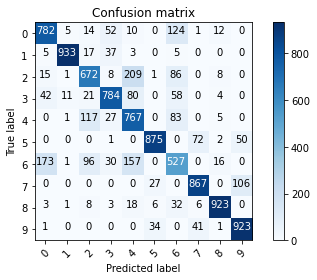

In [14]:
from sklearn.metrics import confusion_matrix
import itertools


cnf_matrix = confusion_matrix(test_labels, y_pred_class_tst)

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
class_names = [str(idx) for idx in range(10)]

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

plt.show()

In [15]:
for i in range(10):
    prec = cnf_matrix[i][i]/ np.sum(cnf_matrix[i])
    rec = cnf_matrix[i][i]/ np.sum(cnf_matrix.T[i])
    print('Точность для класса ' + str(i))
    print(prec)
    print('Полнота для класса ' + str(i))
    print(rec)

Точность для класса 0
0.782
Полнота для класса 0
0.7659157688540646
Точность для класса 1
0.933
Полнота для класса 1
0.9790136411332634
Точность для класса 2
0.672
Полнота для класса 2
0.7111111111111111
Точность для класса 3
0.784
Полнота для класса 3
0.832271762208068
Точность для класса 4
0.767
Полнота для класса 4
0.6165594855305466
Точность для класса 5
0.875
Полнота для класса 5
0.9278897136797455
Точность для класса 6
0.527
Полнота для класса 6
0.5759562841530055
Точность для класса 7
0.867
Полнота для класса 7
0.878419452887538
Точность для класса 8
0.923
Полнота для класса 8
0.9505664263645726
Точность для класса 9
0.923
Полнота для класса 9
0.8554216867469879


Видно, что классы 1, 5, 7, 8, 9 определились лучше всего. При этом хуже всех определился класс 6. Классы 0,3,4 определились с достаточной точностью, а класс 2, неудовлетворительно, но явно лучше, чем 6 класс